# Predict Salary vs. Number of Years of Experience

Este trabajo se asigna a un consultor que desea contratar empleados. El director de RRHH desea predecir el salario de los empleados en base a los años de experiencia. Se usará una regresión Polinómica para tratar de crear un modelo para el dataset.

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 30
pd.options.display.float_format='{:,.2f}'.format

## Step 2: Import Datasets

In [2]:
salary = pd.read_csv('Employee_Salary.csv')
salary.head()

,Years of Experience,Salary
0,1.00,"40,000.00"
1,2.26,"65,979.42"
2,2.45,"67,253.58"
3,2.50,"67,342.44"
4,2.61,"70,532.20"


In [3]:
salary.describe()

,Years of Experience,Salary
count,"2,000.00","2,000.00"
mean,10.74,"111,942.42"
std,2.99,"45,055.82"
min,1.00,"40,000.00"
25%,8.81,"87,938.13"
50%,10.74,"93,376.36"
75%,12.79,"116,978.64"
max,20.00,"500,000.00"


In [4]:
salary.isna().sum()

Years of Experience    0
Salary                 0
dtype: int64

## Step 3: Visualize Dataset

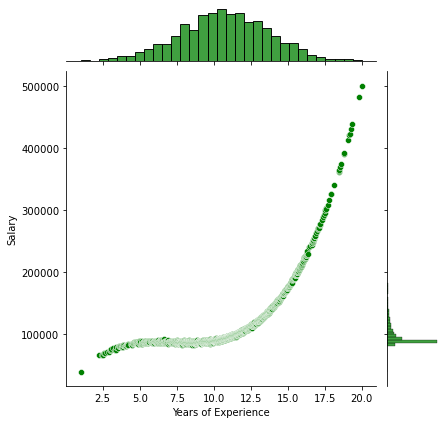

In [5]:
sns.jointplot(x='Years of Experience', y='Salary', data=salary, color='green');

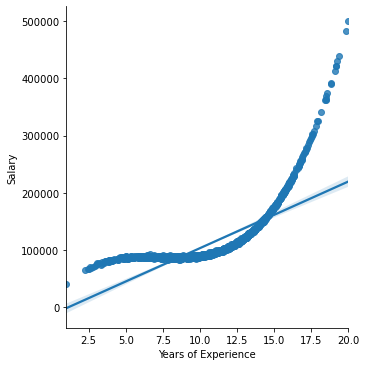

In [13]:
sns.lmplot(x='Years of Experience', y='Salary', data=salary);

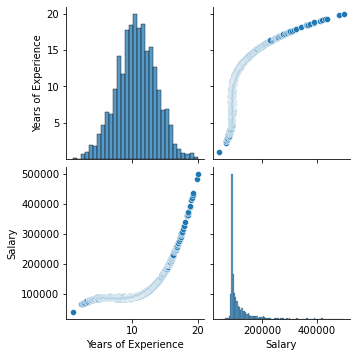

In [14]:
sns.pairplot(data=salary);

## Step 4: Create Training Dataset

In [15]:
X = salary[['Years of Experience']]
y = salary['Salary']

X_train = X
y_train = y

## Step 5: Asumiendo una Regresión Lineal

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)

In [17]:
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
print ('Linear Model Coeff(m): ', regressor.coef_)
print ('Linear Model Coeff(b): ', regressor.intercept_)

Linear Model Coeff(m):  [11640.22916165]
Linear Model Coeff(b):  -13063.099315186919


## Step 6: Visualize the Results

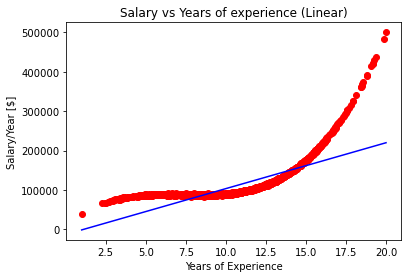

In [19]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary vs Years of experience (Linear)');

## Step 7: Asumiendo una relación Polinomica

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)

In [21]:
X_columns = poly_regressor.fit_transform(X_train)
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [22]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [23]:
print('Model Coeff: ', regressor.coef_)

Model Coeff:  [     0.         -33106.32895617   2095.78613853]


## Step 8: Visualizando los datos

In [24]:
y_predict = regressor.predict (poly_regressor.fit_transform(X_train))

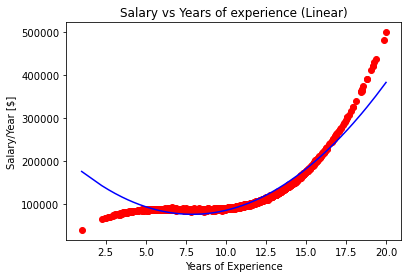

In [27]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_predict, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary vs Years of experience (Linear)');